## 主観的価値の健常者と肥満者の可視化

In [ ]:
import pandas as pd
import numpy as np
import os
from src.const import ROOT_PATH

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
resp = pd.read_csv(os.path.join(ROOT_PATH, "data/data_responses_NCNP_2types.csv"))

In [18]:
outlier = resp["sub_ID"].unique()[
    (resp.groupby("sub_ID")["res_L"].value_counts().unstack() > 896 * 0.75).any(axis=1)
    | (
        (resp.groupby("sub_ID")["res_L"].unique().apply(lambda x: len(x))
        <= 4)
        & (resp.groupby("sub_ID")["res_L"].value_counts().unstack() > 896 * 0.65).any(
            axis=1
        )
    )
]
resp["is_obesity"] = np.where(resp["BMI"] > 30, "肥満", "健常")
resp.loc[resp["sub_ID"].isin(outlier), ["sub_ID", "res_L"]].groupby(
    "sub_ID"
).value_counts()

sub_ID  res_L
50      8        752
        1         90
        4         19
        7         18
        3          8
        6          7
        5          2
83      8        689
        1        194
        4          4
        6          4
        7          3
        2          1
        5          1
104     8        781
        7         61
        6         19
        2          9
        5          8
        1          7
        4          6
        3          5
121     1        701
        8        195
130     8        813
        1         82
        2          1
137     8        590
        1        306
138     8        712
        1         86
        5         52
        6         24
        3          8
        7          8
        4          6
143     8        644
        1        252
147     1        605
        8        291
150     1        678
        8        218
Name: count, dtype: int64

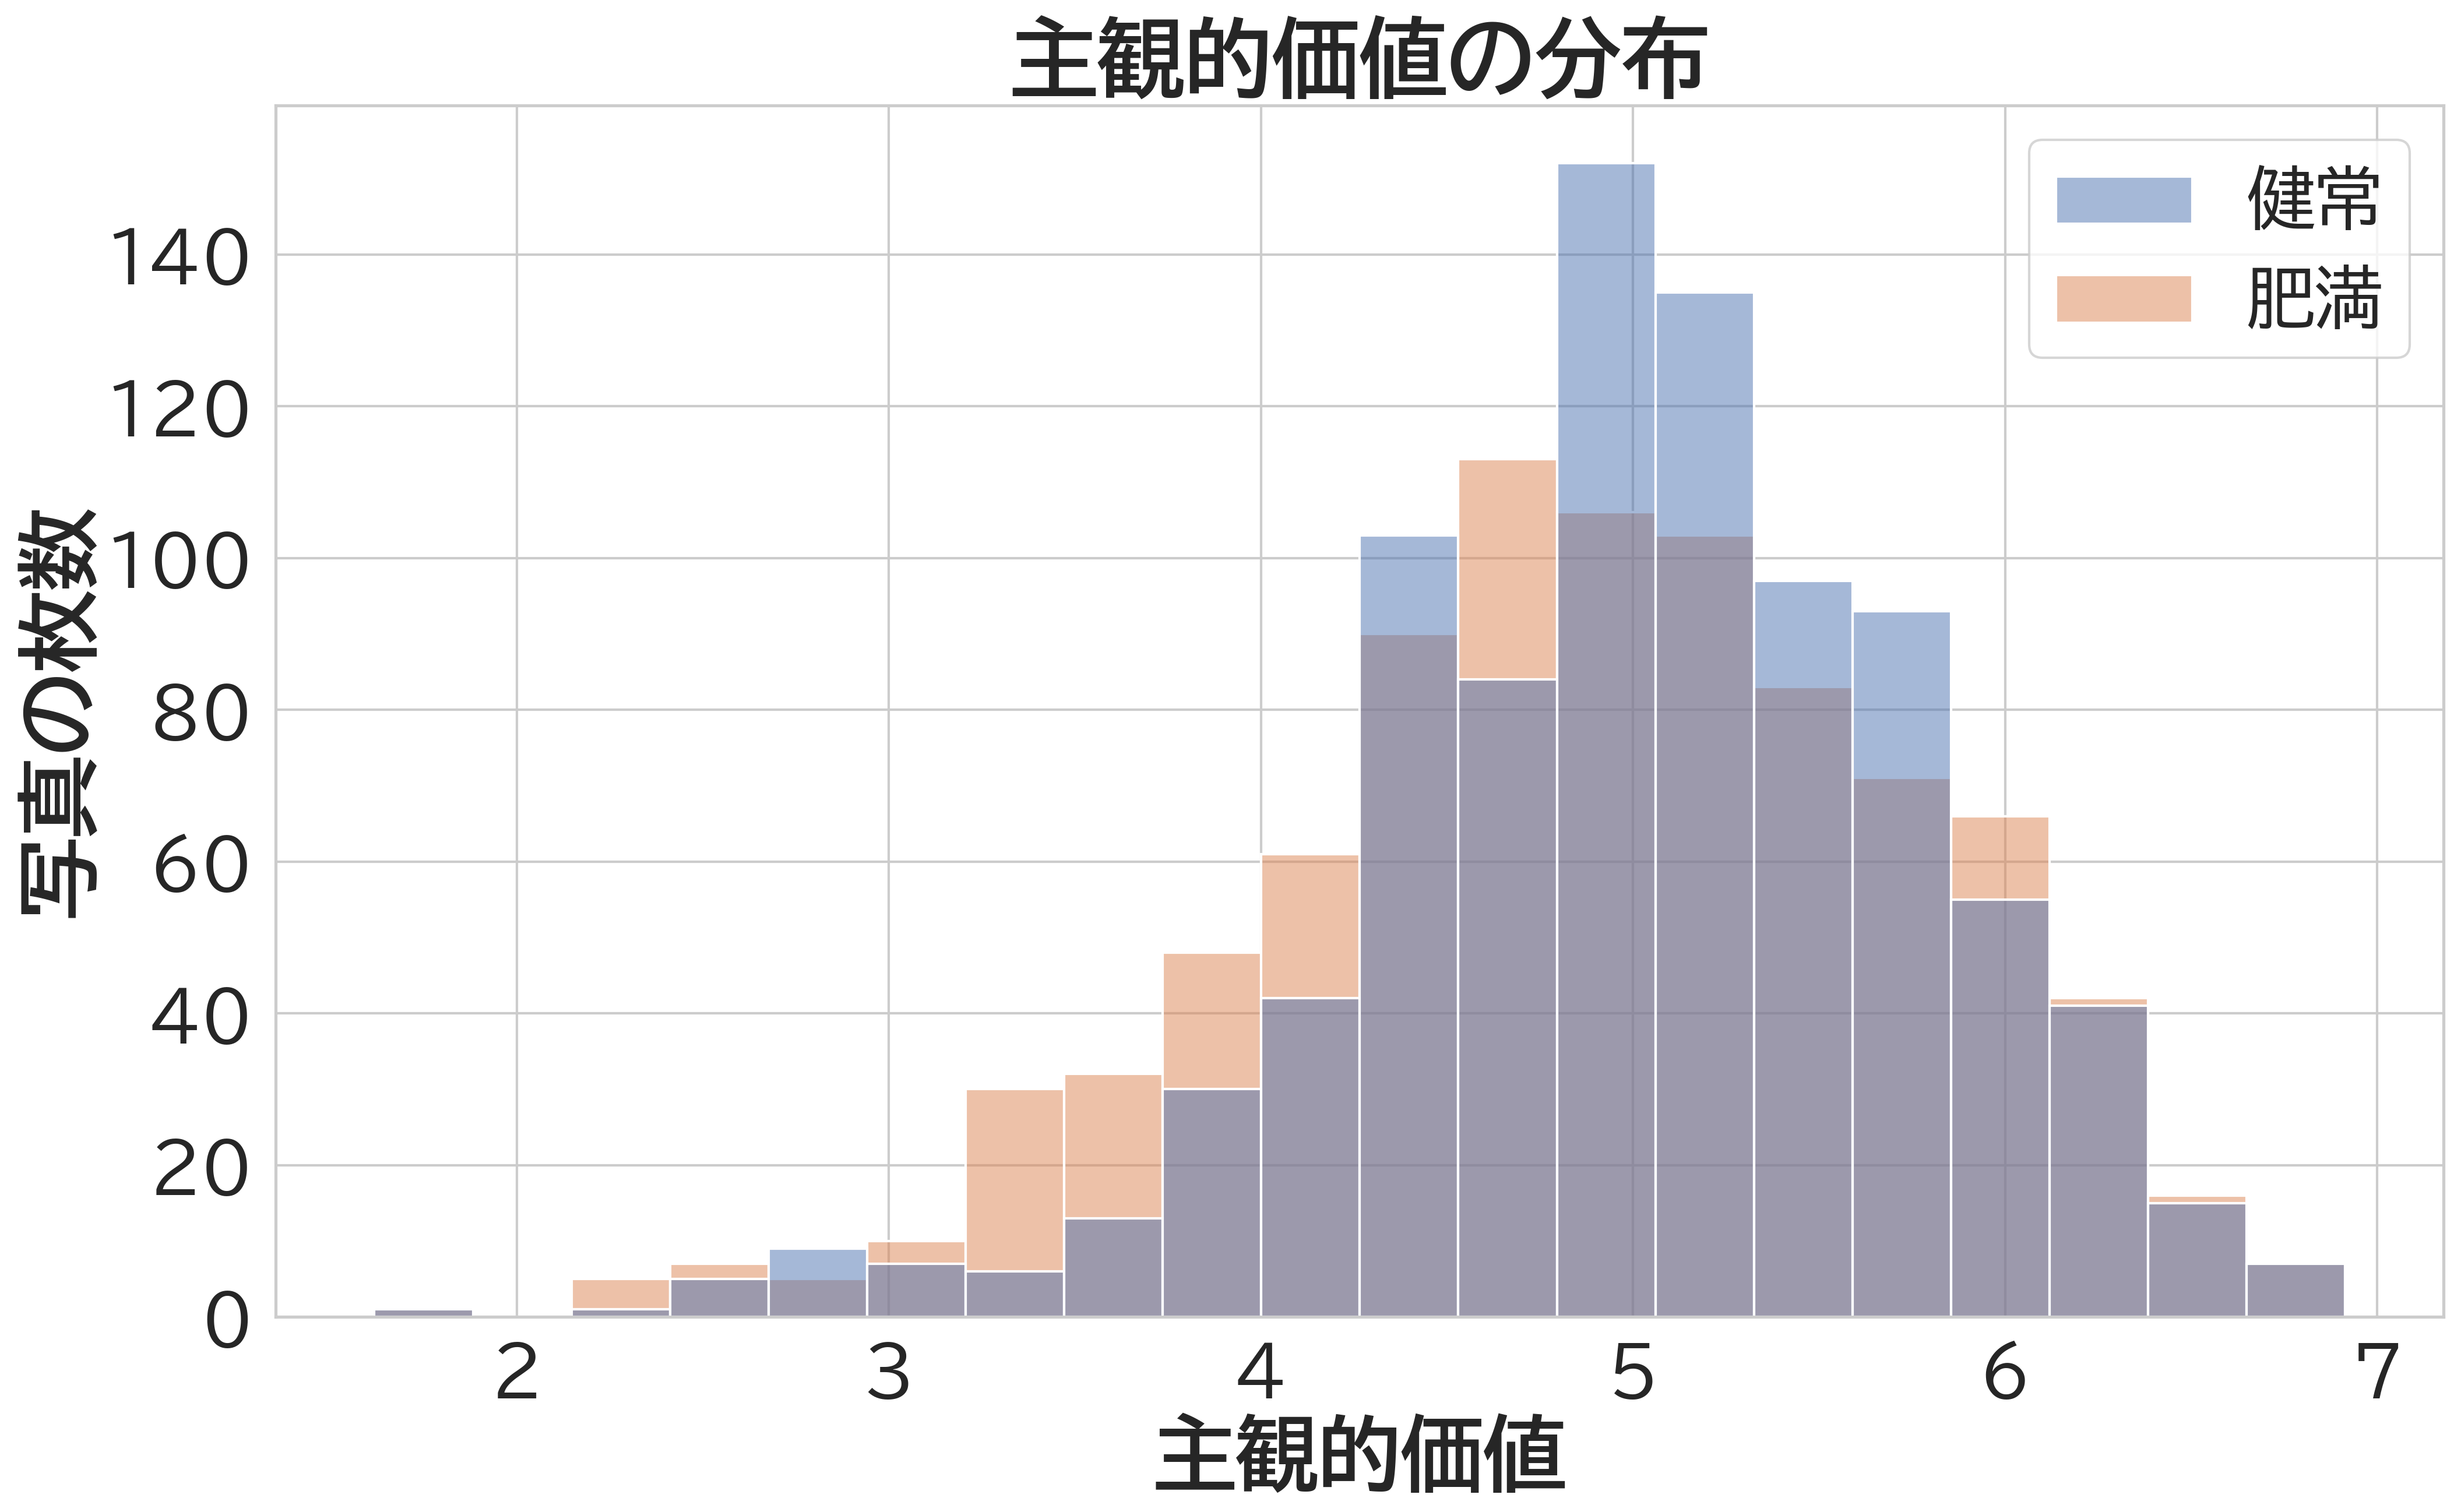

,img,res_L
count,1792.000000,1792.000000
mean,448.500000,4.953156
std,258.724958,0.821927
min,1.000000,1.617284
25%,224.750000,4.453704
50%,448.500000,4.989198
75%,672.250000,5.546296
max,896.000000,6.913580


In [96]:
res_L_mean = resp[~resp["sub_ID"].isin(outlier)].groupby(["img", "is_obesity"])["res_L"].mean().reset_index()
# res_L_mean.hist(="is_obesity")
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(font="BIZ UDPGothic")
sns.set_style("whitegrid")
plt.rcParams["font.family"] = ["BIZ UDPGothic"]
fig = plt.figure(figsize=(16, 9), dpi=300)
hist = sns.histplot(res_L_mean, x="res_L", hue="is_obesity", bins=20)
plt.xlabel("主観的価値", fontsize=34, fontweight="bold")
plt.ylabel("写真の枚数", fontsize=34, fontweight="bold")
plt.title("主観的価値の分布", fontsize=36, fontweight="bold")
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
# plt.legend(title="肥満", fontsize=22)
sns.move_legend(hist, "upper right", bbox_to_anchor=(1, 1), fontsize=28)
hist.legend_.set_title("")
plt.show()
fig.savefig(os.path.join(ROOT_PATH, "data/output/subjective_value_hist.png"))

res_L_mean.describe()

count    896.000000
mean       4.994633
std        0.803738
min        1.688442
25%        4.552764
50%        4.989950
75%        5.567839
max        6.869347
Name: res_L, dtype: float64

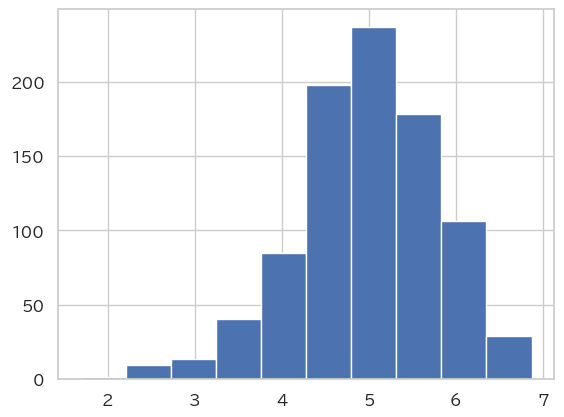

In [97]:
resp.groupby("img")["res_L"].mean().hist()
resp.groupby("img")["res_L"].mean().describe()